In [1]:
# Load Data
from scipy.io import arff
import pandas as pd
import numpy as np

data_files = [
    "dataset/Scenario/Scenario B/TimeBasedFeatures-Dataset-15s-AllinOne.arff"
]
iscx_tbf = None

for data_file in data_files:
    print(f"{data_file}")
    with open(data_file, "r") as f:
      data, meta = arff.loadarff(f)
      ndf = pd.DataFrame(data=data, columns=meta.names())
      if iscx_tbf is None:
        iscx_tbf = ndf
      else:
        iscx_tbf = pd.concat([iscx_tbf, ndf])
    
# fix a loadarff limitation with strings
iscx_tbf["class1"] = iscx_tbf["class1"].map(lambda x: x.decode("utf-8"))

iscx_tbf.head(5)

dataset/Scenario/Scenario B/TimeBasedFeatures-Dataset-15s-AllinOne.arff


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,CHAT
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,CHAT
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,CHAT
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,CHAT
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,CHAT


In [2]:
iscx_tbf.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,...,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04
mean,9.791705e+06,6.086783e+05,6.267802e+05,3.314204e+06,2.861716e+06,1.003929e+06,9.218250e+05,8.448286e+05,6.133578e+05,2073.780095,...,4.768167e+05,1.035025e+06,3.253846e+06,3.635654e+06,4.091204e+06,5.025001e+05,2.983753e+06,3.325142e+06,3.732466e+06,4.531389e+05
std,1.438458e+07,2.243195e+06,2.326442e+06,1.062115e+07,9.652561e+06,3.141855e+06,2.495984e+06,4.336559e+06,2.516395e+06,19115.713624,...,1.404428e+06,3.534085e+06,1.342955e+07,1.356162e+07,1.400211e+07,2.813959e+06,1.334323e+07,1.347430e+07,1.390155e+07,2.785573e+06
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,3.346690e+05,7.000000e+00,2.000000e+00,2.597050e+04,2.454225e+04,1.154333e+04,5.626786e+03,1.145469e+02,0.000000e+00,2.599190,...,9.577449e+03,5.574602e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
50%,1.109263e+07,6.200000e+01,2.100000e+01,2.821430e+05,2.865800e+05,5.104959e+04,3.526250e+04,1.164916e+04,9.605910e+03,11.681220,...,8.412602e+04,7.518175e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
75%,1.494537e+07,1.645000e+03,1.651000e+03,4.289454e+06,4.265465e+06,5.260302e+05,4.843726e+05,6.055940e+05,5.340370e+05,100.671695,...,3.119330e+05,7.659213e+05,2.767727e+06,4.248512e+06,5.690602e+06,0.000000e+00,1.943930e+06,3.333185e+06,4.696002e+06,0.000000e+00
max,6.014050e+08,3.768079e+07,4.300238e+07,3.035957e+08,6.001097e+08,1.520000e+08,4.300000e+07,2.150000e+08,9.800000e+07,1000000.000000,...,6.070000e+07,1.360000e+08,6.014050e+08,6.010000e+08,6.014050e+08,1.680000e+08,6.001097e+08,6.000000e+08,6.001097e+08,1.680000e+08


In [3]:
iscx_tbf["class1"].value_counts()

VOIP         5097
BROWSING     5000
FT           2950
CHAT         2086
P2P          1928
STREAMING     957
MAIL          740
Name: class1, dtype: int64

In [4]:
iscx_values = iscx_tbf.copy()
del iscx_values["class1"]

In [5]:
int(iscx_values.columns.shape[0] / 3)

7

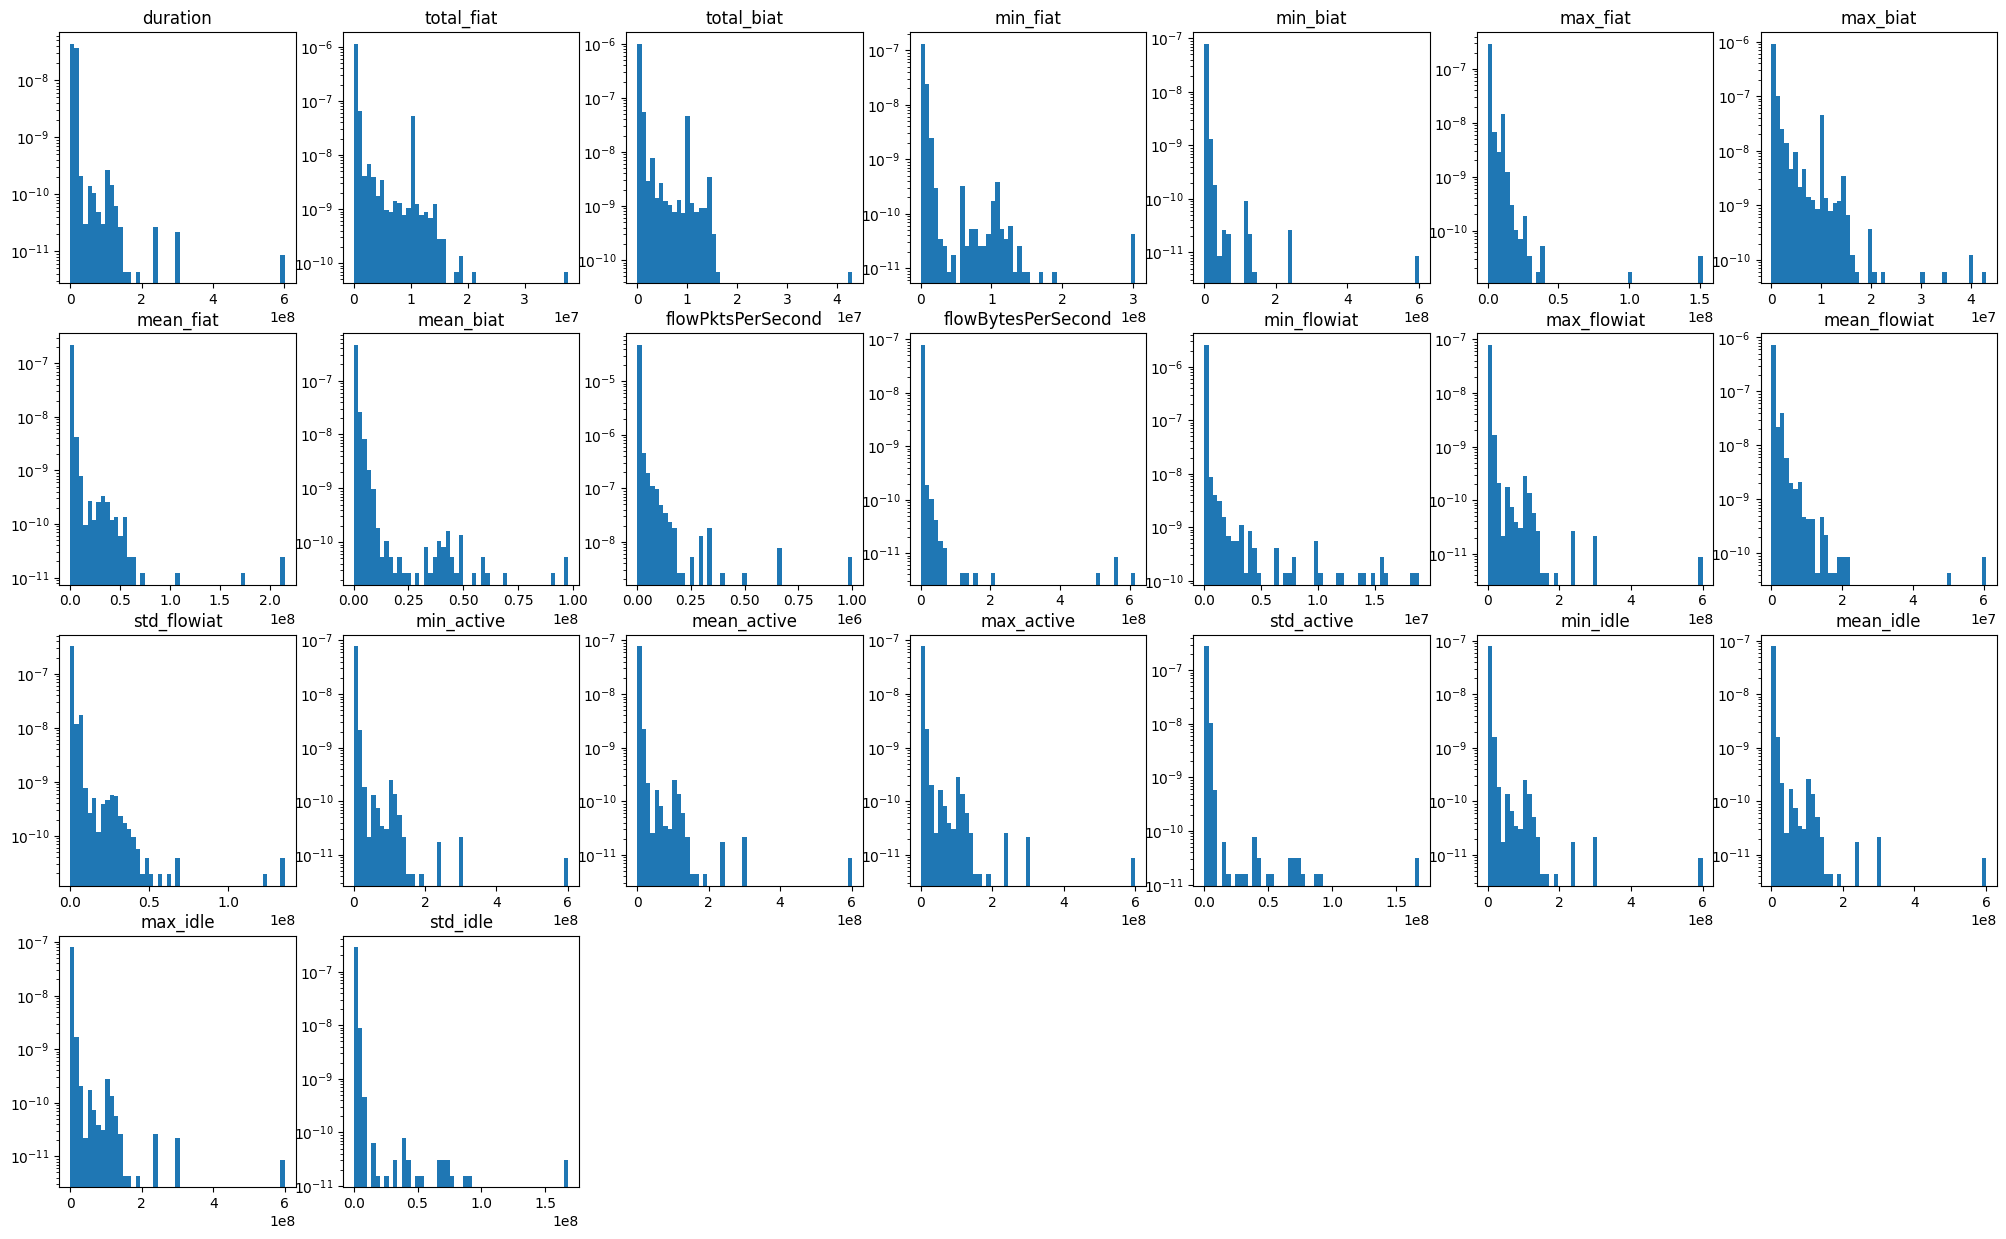

In [6]:
import matplotlib.pyplot as plt

def visualize_space(pd):
    fig = plt.figure(figsize=(25,15))
    plots = int(pd.columns.shape[0] / 3)

    for i, col in enumerate(pd):
        column = pd[col].values
        bins = np.linspace(column.min(), column.max(), 50)
        ax = fig.add_subplot(4, plots, i + 1)
        ax.hist(column, bins, density=True, log=True)
        ax.set_title(col)
    
visualize_space(iscx_values)

In [7]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

iscx_features_df = pd.DataFrame()

for col in iscx_values.columns:
    col_data = iscx_values[col].values[:, None]
    transformed = RobustScaler().fit_transform(col_data)
    iscx_features_df[col] = transformed.squeeze()

iscx_features_df.describe()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,18758.000000,18758.000000,18758.000000,18758.000000,18758.000000,1.875800e+04,18758.000000,18758.000000,1.875800e+04,18758.000000,...,1.875800e+04,1.875800e+04,18758.000000,18758.000000,18758.000000,1.875800e+04,18758.000000,18758.000000,18758.000000,1.875800e+04
mean,-0.089039,371.560616,380.084394,0.711170,0.607211,1.852097e+00,1.851844,1.376066,1.130543e+00,21.026269,...,1.298772e+00,1.262376e+00,1.175638,0.855748,0.718940,5.025001e+05,1.534907,0.997587,0.794818,4.531389e+05
std,0.984524,1369.472121,1410.819862,2.491190,2.276052,6.106775e+00,5.213590,7.162190,4.712023e+00,194.914095,...,4.644955e+00,4.647992e+00,4.852193,3.192087,2.460567,2.813959e+06,6.864045,4.042471,2.960294,2.785573e+06
min,-0.759212,-0.038462,-0.013341,-0.066177,-0.067575,-9.922430e-02,-0.073656,-0.019240,-1.798735e-02,-0.119108,...,-2.782354e-01,-9.887825e-02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,-0.736307,-0.033578,-0.011522,-0.060085,-0.061788,-7.678771e-02,-0.061903,-0.019050,-1.798735e-02,-0.092605,...,-2.465593e-01,-9.154659e-02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,7.074419e-18,0.000000,0.000000,-1.704230e-18,0.000000,...,-2.406421e-17,9.568084e-18,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
75%,0.263693,0.966422,0.988478,0.939915,0.938212,9.232123e-01,0.938097,0.980950,9.820127e-01,0.907395,...,7.534407e-01,9.084534e-01,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00
max,40.402735,23004.105617,26077.838690,71.142194,141.436920,2.953408e+02,89.744366,355.071257,1.834899e+02,10196.418603,...,2.004788e+02,1.787669e+02,217.291948,141.461276,105.683862,1.680000e+08,308.709339,180.008009,127.791576,1.680000e+08


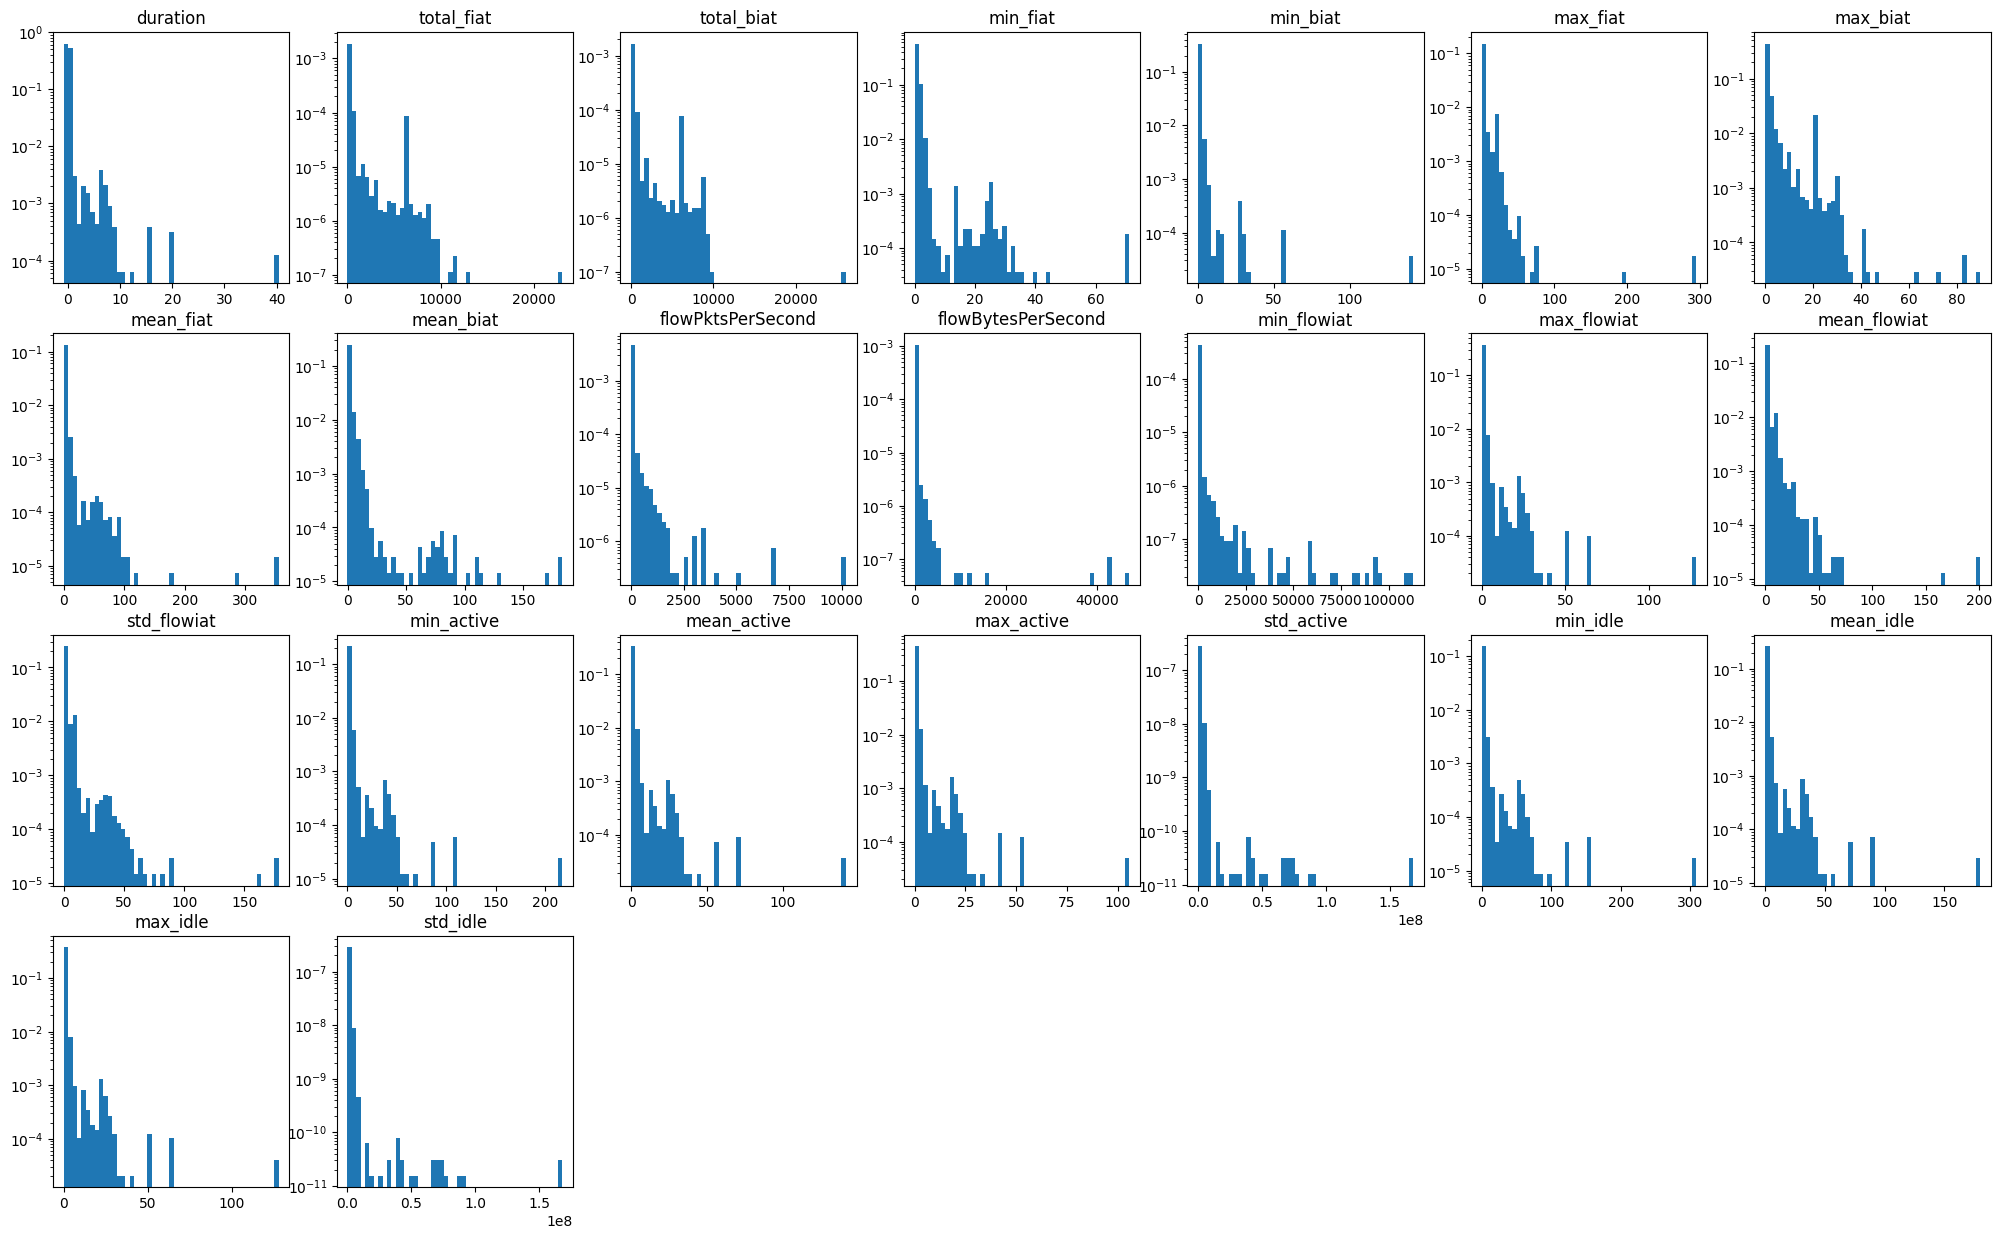

In [8]:
visualize_space(iscx_features_df)

In [9]:
import time
from contextlib import contextmanager

@contextmanager
def timeit(action="Timing"):
    # Record start time
    print(f"{action} started...")
    start_time = time.time()
    
    # Execute task
    yield
    
    # Compute and show elapsed time
    elapsed_time = time.time()-start_time
    print(f"{action} completed. Elapsed time: {elapsed_time:.2f}s")

# Test timing function by sleeping for 1 second
with timeit("Testing timing function"):
    time.sleep(1)

Testing timing function started...
Testing timing function completed. Elapsed time: 1.00s


In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Get feature and label values from original dataset
#iscx_features = np.expand_dims(iscx_features_df.values, axis=1)
iscx_features = iscx_features_df.values
labels = list(iscx_tbf["class1"].unique())
iscx_y = iscx_tbf["class1"].apply(lambda l: int(labels.index(l))).values
iscx_y = tf.one_hot(iscx_y, 7).numpy()
#iscx_y = np.expand_dims(iscx_y, axis=1)

iscx_feat_tv, iscx_feat_test, iscx_y_tv, iscx_y_test = train_test_split(
    iscx_features, iscx_y, test_size=0.25, random_state=2563536
)

iscx_feat_train, iscx_feat_val, iscx_y_train, iscx_y_val = train_test_split(
    iscx_features, iscx_y, test_size=0.10, random_state=2563536
)


2023-03-06 22:57:35.565799: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 22:57:36.650303: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 22:57:36.661561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-06 22:57:36.661746: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but th

In [11]:
print(iscx_feat_train.shape)
print(iscx_y_train.shape)
print(iscx_y_train[:10])

(16882, 23)
(16882, 7)
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


In [12]:
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.initializers import Constant

def build_model(features, labels, dropout_ratio=0.20, optimizer="adam"):
    model = Sequential()
    
    model.add(layers.Dense(512, activation="tanh", input_shape=(features,)))
    model.add(layers.Dense(256, activation="tanh"))
#    model.add(layers.Dense(64, activation="sigmoid"))
    model.add(layers.Reshape((256, 1)))
#    model.add(layers.Dense(64, activation="sigmoid"))
    model.add(layers.Dropout(dropout_ratio)) # 79.44

#    model.add(layers.Conv1D(64, 3, padding="same", activation='relu'))
#    model.add(layers.MaxPool1D(2, strides=2, padding="valid"))
    
    model.add(layers.Conv1D(32, 3, padding="same", activation='tanh'))
    model.add(layers.MaxPool1D(2, strides=2, padding="valid"))
    
    model.add(layers.Conv1D(16, 5, padding="same", activation='tanh'))
    model.add(layers.MaxPool1D(2, strides=2, padding="valid"))
    
#    model.add(layers.Dropout(dropout_ratio)) # 79.44

    model.add(layers.Flatten())
    
    model.add(layers.Dense(300, activation='tanh'))
    model.add(layers.Dense(labels, activation='relu'))

    model.add(layers.Softmax())
        
    # Compile the classification model
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    # Return the model
    return model

def lr_scheduler(epoch, lr):
    if epoch > 700:
        return 0.000001
    if epoch > 500:
        return 0.00005
    if epoch > 150:
        return 0.0001
    if epoch > 100:
        return 0.0002
    if epoch > 50:
        return 0.0005
    return 0.001

callback_list = [callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]

In [13]:
model = build_model(iscx_feat_train.shape[1], len(labels))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12288     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 reshape (Reshape)           (None, 256, 1)            0         
                                                                 
 dropout (Dropout)           (None, 256, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 256, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 128, 32)          0         
 )                                                               
                                                        

In [15]:
history = model.fit(
    iscx_feat_train, 
    iscx_y_train, 
    batch_size=128, 
    epochs=1000, 
    validation_data=(iscx_feat_val, iscx_y_val),
    callbacks=callback_list
)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/1000


2023-03-03 01:59:00.818534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-03-03 01:59:01.204331: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55b1faf0e7c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-03 01:59:01.204355: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-03-03 01:59:01.208486: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-03 01:59:01.208763: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-03-03 01:59:01.285816: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once 

132/132 [==============================] - 3s 4ms/step - loss: 0.2501 - accuracy: 0.5932 - val_loss: 0.2050 - val_accuracy: 0.6477 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.6778 - val_loss: 0.2012 - val_accuracy: 0.6732 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.6882 - val_loss: 0.1942 - val_accuracy: 0.6967 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.7005 - val_loss: 0.1831 - val_accuracy: 0.7106 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.6993 - val_loss: 0.1815 - val_ac

Epoch 38/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.7507 - val_loss: 0.1613 - val_accuracy: 0.7495 - lr: 0.0010

Epoch 39: LearningRateScheduler setting learning rate to 0.001.
Epoch 39/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.7487 - val_loss: 0.1574 - val_accuracy: 0.7479 - lr: 0.0010

Epoch 40: LearningRateScheduler setting learning rate to 0.001.
Epoch 40/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 0.7490 - val_loss: 0.1592 - val_accuracy: 0.7457 - lr: 0.0010

Epoch 41: LearningRateScheduler setting learning rate to 0.001.
Epoch 41/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1543 - accuracy: 0.7499 - val_loss: 0.1562 - val_accuracy: 0.7479 - lr: 0.0010

Epoch 42: LearningRateScheduler setting learning rate to 0.001.
Epoch 42/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.7493 - val

Epoch 110/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 0.7933 - val_loss: 0.1471 - val_accuracy: 0.7713 - lr: 2.0000e-04

Epoch 111: LearningRateScheduler setting learning rate to 0.0002.
Epoch 111/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.7934 - val_loss: 0.1478 - val_accuracy: 0.7697 - lr: 2.0000e-04

Epoch 112: LearningRateScheduler setting learning rate to 0.0002.
Epoch 112/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.7937 - val_loss: 0.1450 - val_accuracy: 0.7713 - lr: 2.0000e-04

Epoch 113: LearningRateScheduler setting learning rate to 0.0002.
Epoch 113/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.7941 - val_loss: 0.1473 - val_accuracy: 0.7756 - lr: 2.0000e-04

Epoch 114: LearningRateScheduler setting learning rate to 0.0002.
Epoch 114/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.


Epoch 146: LearningRateScheduler setting learning rate to 0.0002.
Epoch 146/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.7984 - val_loss: 0.1479 - val_accuracy: 0.7740 - lr: 2.0000e-04

Epoch 147: LearningRateScheduler setting learning rate to 0.0002.
Epoch 147/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.7988 - val_loss: 0.1486 - val_accuracy: 0.7751 - lr: 2.0000e-04

Epoch 148: LearningRateScheduler setting learning rate to 0.0002.
Epoch 148/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.8005 - val_loss: 0.1469 - val_accuracy: 0.7788 - lr: 2.0000e-04

Epoch 149: LearningRateScheduler setting learning rate to 0.0002.
Epoch 149/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.7993 - val_loss: 0.1473 - val_accuracy: 0.7772 - lr: 2.0000e-04

Epoch 150: LearningRateScheduler setting learning rate to 0.0002.
Epoch 150/100


Epoch 217: LearningRateScheduler setting learning rate to 0.0001.
Epoch 217/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.8214 - val_loss: 0.1436 - val_accuracy: 0.7820 - lr: 1.0000e-04

Epoch 218: LearningRateScheduler setting learning rate to 0.0001.
Epoch 218/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.8207 - val_loss: 0.1429 - val_accuracy: 0.7916 - lr: 1.0000e-04

Epoch 219: LearningRateScheduler setting learning rate to 0.0001.
Epoch 219/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.8224 - val_loss: 0.1460 - val_accuracy: 0.7799 - lr: 1.0000e-04

Epoch 220: LearningRateScheduler setting learning rate to 0.0001.
Epoch 220/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.8241 - val_loss: 0.1441 - val_accuracy: 0.7820 - lr: 1.0000e-04

Epoch 221: LearningRateScheduler setting learning rate to 0.0001.
Epoch 221/100


Epoch 288: LearningRateScheduler setting learning rate to 0.0001.
Epoch 288/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.8273 - val_loss: 0.1438 - val_accuracy: 0.7953 - lr: 1.0000e-04

Epoch 289: LearningRateScheduler setting learning rate to 0.0001.
Epoch 289/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.8248 - val_loss: 0.1454 - val_accuracy: 0.7857 - lr: 1.0000e-04

Epoch 290: LearningRateScheduler setting learning rate to 0.0001.
Epoch 290/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.8266 - val_loss: 0.1482 - val_accuracy: 0.7841 - lr: 1.0000e-04

Epoch 291: LearningRateScheduler setting learning rate to 0.0001.
Epoch 291/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1061 - accuracy: 0.8233 - val_loss: 0.1435 - val_accuracy: 0.7862 - lr: 1.0000e-04

Epoch 292: LearningRateScheduler setting learning rate to 0.0001.
Epoch 292/100


Epoch 359: LearningRateScheduler setting learning rate to 0.0001.
Epoch 359/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.8318 - val_loss: 0.1520 - val_accuracy: 0.7852 - lr: 1.0000e-04

Epoch 360: LearningRateScheduler setting learning rate to 0.0001.
Epoch 360/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.8303 - val_loss: 0.1446 - val_accuracy: 0.7921 - lr: 1.0000e-04

Epoch 361: LearningRateScheduler setting learning rate to 0.0001.
Epoch 361/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.8310 - val_loss: 0.1458 - val_accuracy: 0.7862 - lr: 1.0000e-04

Epoch 362: LearningRateScheduler setting learning rate to 0.0001.
Epoch 362/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.8303 - val_loss: 0.1447 - val_accuracy: 0.7852 - lr: 1.0000e-04

Epoch 363: LearningRateScheduler setting learning rate to 0.0001.
Epoch 363/100


Epoch 430: LearningRateScheduler setting learning rate to 0.0001.
Epoch 430/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.8361 - val_loss: 0.1500 - val_accuracy: 0.7836 - lr: 1.0000e-04

Epoch 431: LearningRateScheduler setting learning rate to 0.0001.
Epoch 431/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.8354 - val_loss: 0.1465 - val_accuracy: 0.7980 - lr: 1.0000e-04

Epoch 432: LearningRateScheduler setting learning rate to 0.0001.
Epoch 432/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.8336 - val_loss: 0.1476 - val_accuracy: 0.8028 - lr: 1.0000e-04

Epoch 433: LearningRateScheduler setting learning rate to 0.0001.
Epoch 433/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.1007 - accuracy: 0.8338 - val_loss: 0.1472 - val_accuracy: 0.7974 - lr: 1.0000e-04

Epoch 434: LearningRateScheduler setting learning rate to 0.0001.
Epoch 434/100


Epoch 501: LearningRateScheduler setting learning rate to 0.0001.
Epoch 501/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.8404 - val_loss: 0.1480 - val_accuracy: 0.7932 - lr: 1.0000e-04

Epoch 502: LearningRateScheduler setting learning rate to 5e-05.
Epoch 502/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.8421 - val_loss: 0.1464 - val_accuracy: 0.7937 - lr: 5.0000e-05

Epoch 503: LearningRateScheduler setting learning rate to 5e-05.
Epoch 503/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.8439 - val_loss: 0.1465 - val_accuracy: 0.7942 - lr: 5.0000e-05

Epoch 504: LearningRateScheduler setting learning rate to 5e-05.
Epoch 504/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.8424 - val_loss: 0.1467 - val_accuracy: 0.7948 - lr: 5.0000e-05

Epoch 505: LearningRateScheduler setting learning rate to 5e-05.
Epoch 505/1000
13


Epoch 537: LearningRateScheduler setting learning rate to 5e-05.
Epoch 537/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0941 - accuracy: 0.8458 - val_loss: 0.1462 - val_accuracy: 0.7969 - lr: 5.0000e-05

Epoch 538: LearningRateScheduler setting learning rate to 5e-05.
Epoch 538/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.8454 - val_loss: 0.1479 - val_accuracy: 0.7953 - lr: 5.0000e-05

Epoch 539: LearningRateScheduler setting learning rate to 5e-05.
Epoch 539/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.8456 - val_loss: 0.1482 - val_accuracy: 0.7958 - lr: 5.0000e-05

Epoch 540: LearningRateScheduler setting learning rate to 5e-05.
Epoch 540/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.8465 - val_loss: 0.1466 - val_accuracy: 0.7958 - lr: 5.0000e-05

Epoch 541: LearningRateScheduler setting learning rate to 5e-05.
Epoch 541/1000
132


Epoch 573: LearningRateScheduler setting learning rate to 5e-05.
Epoch 573/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.8458 - val_loss: 0.1479 - val_accuracy: 0.8001 - lr: 5.0000e-05

Epoch 574: LearningRateScheduler setting learning rate to 5e-05.
Epoch 574/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.8460 - val_loss: 0.1472 - val_accuracy: 0.7974 - lr: 5.0000e-05

Epoch 575: LearningRateScheduler setting learning rate to 5e-05.
Epoch 575/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.8467 - val_loss: 0.1488 - val_accuracy: 0.7990 - lr: 5.0000e-05

Epoch 576: LearningRateScheduler setting learning rate to 5e-05.
Epoch 576/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.8463 - val_loss: 0.1474 - val_accuracy: 0.7964 - lr: 5.0000e-05

Epoch 577: LearningRateScheduler setting learning rate to 5e-05.
Epoch 577/1000
132


Epoch 609: LearningRateScheduler setting learning rate to 5e-05.
Epoch 609/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.8480 - val_loss: 0.1482 - val_accuracy: 0.7996 - lr: 5.0000e-05

Epoch 610: LearningRateScheduler setting learning rate to 5e-05.
Epoch 610/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.8484 - val_loss: 0.1484 - val_accuracy: 0.8006 - lr: 5.0000e-05

Epoch 611: LearningRateScheduler setting learning rate to 5e-05.
Epoch 611/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.8485 - val_loss: 0.1494 - val_accuracy: 0.7953 - lr: 5.0000e-05

Epoch 612: LearningRateScheduler setting learning rate to 5e-05.
Epoch 612/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.8476 - val_loss: 0.1481 - val_accuracy: 0.7964 - lr: 5.0000e-05

Epoch 613: LearningRateScheduler setting learning rate to 5e-05.
Epoch 613/1000
132


Epoch 645: LearningRateScheduler setting learning rate to 5e-05.
Epoch 645/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.8488 - val_loss: 0.1499 - val_accuracy: 0.7964 - lr: 5.0000e-05

Epoch 646: LearningRateScheduler setting learning rate to 5e-05.
Epoch 646/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.8466 - val_loss: 0.1484 - val_accuracy: 0.7990 - lr: 5.0000e-05

Epoch 647: LearningRateScheduler setting learning rate to 5e-05.
Epoch 647/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.8467 - val_loss: 0.1487 - val_accuracy: 0.7974 - lr: 5.0000e-05

Epoch 648: LearningRateScheduler setting learning rate to 5e-05.
Epoch 648/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.8481 - val_loss: 0.1483 - val_accuracy: 0.7996 - lr: 5.0000e-05

Epoch 649: LearningRateScheduler setting learning rate to 5e-05.
Epoch 649/1000
132


Epoch 681: LearningRateScheduler setting learning rate to 5e-05.
Epoch 681/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.8495 - val_loss: 0.1498 - val_accuracy: 0.7958 - lr: 5.0000e-05

Epoch 682: LearningRateScheduler setting learning rate to 5e-05.
Epoch 682/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.8489 - val_loss: 0.1520 - val_accuracy: 0.7889 - lr: 5.0000e-05

Epoch 683: LearningRateScheduler setting learning rate to 5e-05.
Epoch 683/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.8452 - val_loss: 0.1543 - val_accuracy: 0.7846 - lr: 5.0000e-05

Epoch 684: LearningRateScheduler setting learning rate to 5e-05.
Epoch 684/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.8494 - val_loss: 0.1478 - val_accuracy: 0.8006 - lr: 5.0000e-05

Epoch 685: LearningRateScheduler setting learning rate to 5e-05.
Epoch 685/1000
132


Epoch 717: LearningRateScheduler setting learning rate to 1e-06.
Epoch 717/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.8520 - val_loss: 0.1475 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 718: LearningRateScheduler setting learning rate to 1e-06.
Epoch 718/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.8547 - val_loss: 0.1474 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 719: LearningRateScheduler setting learning rate to 1e-06.
Epoch 719/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.8515 - val_loss: 0.1475 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 720: LearningRateScheduler setting learning rate to 1e-06.
Epoch 720/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.8552 - val_loss: 0.1475 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 721: LearningRateScheduler setting learning rate to 1e-06.
Epoch 721/1000
132


Epoch 753: LearningRateScheduler setting learning rate to 1e-06.
Epoch 753/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.8527 - val_loss: 0.1475 - val_accuracy: 0.8006 - lr: 1.0000e-06

Epoch 754: LearningRateScheduler setting learning rate to 1e-06.
Epoch 754/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.8555 - val_loss: 0.1475 - val_accuracy: 0.8006 - lr: 1.0000e-06

Epoch 755: LearningRateScheduler setting learning rate to 1e-06.
Epoch 755/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.8547 - val_loss: 0.1475 - val_accuracy: 0.8017 - lr: 1.0000e-06

Epoch 756: LearningRateScheduler setting learning rate to 1e-06.
Epoch 756/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.8548 - val_loss: 0.1475 - val_accuracy: 0.8012 - lr: 1.0000e-06

Epoch 757: LearningRateScheduler setting learning rate to 1e-06.
Epoch 757/1000
132


Epoch 789: LearningRateScheduler setting learning rate to 1e-06.
Epoch 789/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.8535 - val_loss: 0.1476 - val_accuracy: 0.8006 - lr: 1.0000e-06

Epoch 790: LearningRateScheduler setting learning rate to 1e-06.
Epoch 790/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.8552 - val_loss: 0.1476 - val_accuracy: 0.8006 - lr: 1.0000e-06

Epoch 791: LearningRateScheduler setting learning rate to 1e-06.
Epoch 791/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.8553 - val_loss: 0.1476 - val_accuracy: 0.8001 - lr: 1.0000e-06

Epoch 792: LearningRateScheduler setting learning rate to 1e-06.
Epoch 792/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.8566 - val_loss: 0.1476 - val_accuracy: 0.8006 - lr: 1.0000e-06

Epoch 793: LearningRateScheduler setting learning rate to 1e-06.
Epoch 793/1000
132


Epoch 825: LearningRateScheduler setting learning rate to 1e-06.
Epoch 825/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.8540 - val_loss: 0.1479 - val_accuracy: 0.8006 - lr: 1.0000e-06

Epoch 826: LearningRateScheduler setting learning rate to 1e-06.
Epoch 826/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.8553 - val_loss: 0.1478 - val_accuracy: 0.8001 - lr: 1.0000e-06

Epoch 827: LearningRateScheduler setting learning rate to 1e-06.
Epoch 827/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.8556 - val_loss: 0.1477 - val_accuracy: 0.8006 - lr: 1.0000e-06

Epoch 828: LearningRateScheduler setting learning rate to 1e-06.
Epoch 828/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.8555 - val_loss: 0.1478 - val_accuracy: 0.8001 - lr: 1.0000e-06

Epoch 829: LearningRateScheduler setting learning rate to 1e-06.
Epoch 829/1000
132


Epoch 861: LearningRateScheduler setting learning rate to 1e-06.
Epoch 861/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.8551 - val_loss: 0.1478 - val_accuracy: 0.8017 - lr: 1.0000e-06

Epoch 862: LearningRateScheduler setting learning rate to 1e-06.
Epoch 862/1000
132/132 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.8550 - val_loss: 0.1479 - val_accuracy: 0.8012 - lr: 1.0000e-06

Epoch 863: LearningRateScheduler setting learning rate to 1e-06.
Epoch 863/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.8561 - val_loss: 0.1478 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 864: LearningRateScheduler setting learning rate to 1e-06.
Epoch 864/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.8537 - val_loss: 0.1479 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 865: LearningRateScheduler setting learning rate to 1e-06.
Epoch 865/1000
132


Epoch 897: LearningRateScheduler setting learning rate to 1e-06.
Epoch 897/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.8552 - val_loss: 0.1478 - val_accuracy: 0.8033 - lr: 1.0000e-06

Epoch 898: LearningRateScheduler setting learning rate to 1e-06.
Epoch 898/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.8548 - val_loss: 0.1478 - val_accuracy: 0.8033 - lr: 1.0000e-06

Epoch 899: LearningRateScheduler setting learning rate to 1e-06.
Epoch 899/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.8551 - val_loss: 0.1478 - val_accuracy: 0.8044 - lr: 1.0000e-06

Epoch 900: LearningRateScheduler setting learning rate to 1e-06.
Epoch 900/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.8547 - val_loss: 0.1478 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 901: LearningRateScheduler setting learning rate to 1e-06.
Epoch 901/1000
132


Epoch 933: LearningRateScheduler setting learning rate to 1e-06.
Epoch 933/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.8561 - val_loss: 0.1478 - val_accuracy: 0.8028 - lr: 1.0000e-06

Epoch 934: LearningRateScheduler setting learning rate to 1e-06.
Epoch 934/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.8555 - val_loss: 0.1478 - val_accuracy: 0.8028 - lr: 1.0000e-06

Epoch 935: LearningRateScheduler setting learning rate to 1e-06.
Epoch 935/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.8560 - val_loss: 0.1477 - val_accuracy: 0.8028 - lr: 1.0000e-06

Epoch 936: LearningRateScheduler setting learning rate to 1e-06.
Epoch 936/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.8569 - val_loss: 0.1478 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 937: LearningRateScheduler setting learning rate to 1e-06.
Epoch 937/1000
132


Epoch 969: LearningRateScheduler setting learning rate to 1e-06.
Epoch 969/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.8546 - val_loss: 0.1478 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 970: LearningRateScheduler setting learning rate to 1e-06.
Epoch 970/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.8575 - val_loss: 0.1478 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 971: LearningRateScheduler setting learning rate to 1e-06.
Epoch 971/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.8555 - val_loss: 0.1477 - val_accuracy: 0.8022 - lr: 1.0000e-06

Epoch 972: LearningRateScheduler setting learning rate to 1e-06.
Epoch 972/1000
132/132 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.8561 - val_loss: 0.1477 - val_accuracy: 0.8028 - lr: 1.0000e-06

Epoch 973: LearningRateScheduler setting learning rate to 1e-06.
Epoch 973/1000
132

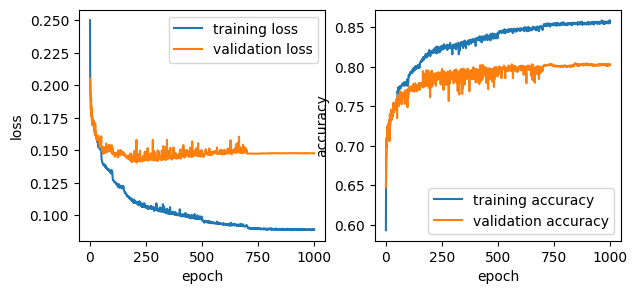

In [16]:
from matplotlib import pyplot as plt

fix, ax = plt.subplots(1, 2, figsize=(7,3))
ax[0].plot(history.history["loss"], label="training loss")
ax[0].plot(history.history["val_loss"], label="validation loss")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], label="training accuracy")
ax[1].plot(history.history["val_accuracy"], label="validation accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend()


In [17]:
predict = model.predict(iscx_feat_test)
predict = predict.argmax(axis=1)

147/147 [==============================] - 0s 868us/step


In [18]:
predict = [labels[x] for x in predict]
predict[:10]

['BROWSING',
 'VOIP',
 'VOIP',
 'BROWSING',
 'VOIP',
 'VOIP',
 'VOIP',
 'FT',
 'VOIP',
 'FT']

In [19]:
y_hat = iscx_y_test.argmax(axis=1)
y_hat = [labels[x] for x in y_hat]
y_hat[:10]

['BROWSING',
 'VOIP',
 'VOIP',
 'BROWSING',
 'VOIP',
 'VOIP',
 'VOIP',
 'FT',
 'VOIP',
 'FT']

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(pred, y):    
    print(classification_report(y, pred))
    print(confusion_matrix(y, pred), "\n")

In [21]:
evaluate_model(predict, y_hat)

              precision    recall  f1-score   support

    BROWSING       0.73      0.94      0.82      1238
        CHAT       0.72      0.43      0.53       531
          FT       0.84      0.68      0.75       740
        MAIL       0.86      0.84      0.85       197
         P2P       0.80      0.92      0.86       474
   STREAMING       0.88      0.65      0.75       252
        VOIP       0.99      0.99      0.99      1258

    accuracy                           0.83      4690
   macro avg       0.83      0.78      0.79      4690
weighted avg       0.84      0.83      0.83      4690

[[1167   36   22    0    6    7    0]
 [ 235  226   39   12   13    5    1]
 [ 123   33  505   15   59    4    1]
 [  13    3   11  166    3    0    1]
 [   8    2   18    0  436    5    5]
 [  48   15    3    0   23  163    0]
 [   1    1    2    0    4    1 1249]] 



In [80]:
24 * 24

576

In [15]:
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.initializers import Constant

def build_model(features, labels, dropout_ratio=0.10, optimizer="adam"):
    model = Sequential()
    
    model.add(layers.Dense(576, activation="tanh", input_shape=(features,)))
    model.add(layers.Reshape((24, 24, 1)))
    model.add(layers.Conv2D(24, 3, activation='relu'))
    model.add(layers.Conv2D(16, 3,  activation='relu'))
    model.add(layers.Conv2D(8, 3,  activation='relu'))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='tanh'))
    model.add(layers.Dropout(dropout_ratio)) # 79.44

    model.add(layers.Dense(128, activation='tanh'))
    model.add(layers.Dropout(dropout_ratio)) # 79.44

    model.add(layers.Dense(32, activation='tanh'))
    model.add(layers.Dropout(dropout_ratio)) # 79.44

    model.add(layers.Dense(labels, activation='relu'))

    model.add(layers.Softmax())
        
    # Compile the classification model
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    # Return the model
    return model

def lr_scheduler(epoch, lr):
    if epoch > 800:
        return 0.000001
    if epoch > 500:
        return 0.00001
    if epoch > 200:
        return 0.000025
    if epoch > 100:
        return 0.0001
    if epoch > 50:
        return 0.0005
    return 0.001

callback_list = [callbacks.LearningRateScheduler(lr_scheduler, verbose=1)]

In [16]:
model = build_model(iscx_feat_train.shape[1], len(labels))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 576)               13824     
                                                                 
 reshape_1 (Reshape)         (None, 24, 24, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 24)        240       
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 16)        3472      
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 8)         1160      
                                                                 
 flatten_1 (Flatten)         (None, 2592)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [18]:
with timeit("Total model training time"):
    history = model.fit(
        iscx_feat_train, 
        iscx_y_train, 
        batch_size=128, 
        epochs=2000, 
        validation_data=(iscx_feat_val, iscx_y_val),
        callbacks=callback_list
    )

Total model training time started...

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/2000


2023-03-06 22:58:37.126470: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600
2023-03-06 22:58:37.517374: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x5563c0f46130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-06 22:58:37.517395: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-03-06 22:58:37.523319: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-06 22:58:37.523765: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-03-06 22:58:37.604456: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once 

132/132 [==============================] - 3s 5ms/step - loss: 0.2523 - accuracy: 0.6188 - val_loss: 0.2125 - val_accuracy: 0.6604 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.6739 - val_loss: 0.2026 - val_accuracy: 0.6876 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.2015 - accuracy: 0.6861 - val_loss: 0.1910 - val_accuracy: 0.7106 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1919 - accuracy: 0.7083 - val_loss: 0.1825 - val_accuracy: 0.7207 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.7119 - val_loss: 0.1780 - val_ac

Epoch 38/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1516 - accuracy: 0.7573 - val_loss: 0.1565 - val_accuracy: 0.7495 - lr: 0.0010

Epoch 39: LearningRateScheduler setting learning rate to 0.001.
Epoch 39/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.7547 - val_loss: 0.1585 - val_accuracy: 0.7505 - lr: 0.0010

Epoch 40: LearningRateScheduler setting learning rate to 0.001.
Epoch 40/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.7576 - val_loss: 0.1576 - val_accuracy: 0.7527 - lr: 0.0010

Epoch 41: LearningRateScheduler setting learning rate to 0.001.
Epoch 41/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.7597 - val_loss: 0.1570 - val_accuracy: 0.7436 - lr: 0.0010

Epoch 42: LearningRateScheduler setting learning rate to 0.001.
Epoch 42/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1521 - accuracy: 0.7549 - val

132/132 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.7823 - val_loss: 0.1510 - val_accuracy: 0.7575 - lr: 5.0000e-04

Epoch 75: LearningRateScheduler setting learning rate to 0.0005.
Epoch 75/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.7822 - val_loss: 0.1540 - val_accuracy: 0.7617 - lr: 5.0000e-04

Epoch 76: LearningRateScheduler setting learning rate to 0.0005.
Epoch 76/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.7796 - val_loss: 0.1510 - val_accuracy: 0.7697 - lr: 5.0000e-04

Epoch 77: LearningRateScheduler setting learning rate to 0.0005.
Epoch 77/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.7850 - val_loss: 0.1609 - val_accuracy: 0.7607 - lr: 5.0000e-04

Epoch 78: LearningRateScheduler setting learning rate to 0.0005.
Epoch 78/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.7828

Epoch 110/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.7992 - val_loss: 0.1537 - val_accuracy: 0.7681 - lr: 1.0000e-04

Epoch 111: LearningRateScheduler setting learning rate to 0.0001.
Epoch 111/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.8017 - val_loss: 0.1534 - val_accuracy: 0.7692 - lr: 1.0000e-04

Epoch 112: LearningRateScheduler setting learning rate to 0.0001.
Epoch 112/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.7988 - val_loss: 0.1526 - val_accuracy: 0.7703 - lr: 1.0000e-04

Epoch 113: LearningRateScheduler setting learning rate to 0.0001.
Epoch 113/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1214 - accuracy: 0.7987 - val_loss: 0.1542 - val_accuracy: 0.7724 - lr: 1.0000e-04

Epoch 114: LearningRateScheduler setting learning rate to 0.0001.
Epoch 114/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.


Epoch 146: LearningRateScheduler setting learning rate to 0.0001.
Epoch 146/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1157 - accuracy: 0.8047 - val_loss: 0.1522 - val_accuracy: 0.7719 - lr: 1.0000e-04

Epoch 147: LearningRateScheduler setting learning rate to 0.0001.
Epoch 147/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.8054 - val_loss: 0.1529 - val_accuracy: 0.7719 - lr: 1.0000e-04

Epoch 148: LearningRateScheduler setting learning rate to 0.0001.
Epoch 148/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.8046 - val_loss: 0.1522 - val_accuracy: 0.7767 - lr: 1.0000e-04

Epoch 149: LearningRateScheduler setting learning rate to 0.0001.
Epoch 149/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1153 - accuracy: 0.8054 - val_loss: 0.1532 - val_accuracy: 0.7724 - lr: 1.0000e-04

Epoch 150: LearningRateScheduler setting learning rate to 0.0001.
Epoch 150/200

132/132 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.8113 - val_loss: 0.1527 - val_accuracy: 0.7761 - lr: 1.0000e-04

Epoch 182: LearningRateScheduler setting learning rate to 0.0001.
Epoch 182/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.8084 - val_loss: 0.1526 - val_accuracy: 0.7729 - lr: 1.0000e-04

Epoch 183: LearningRateScheduler setting learning rate to 0.0001.
Epoch 183/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.8103 - val_loss: 0.1538 - val_accuracy: 0.7745 - lr: 1.0000e-04

Epoch 184: LearningRateScheduler setting learning rate to 0.0001.
Epoch 184/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.8102 - val_loss: 0.1531 - val_accuracy: 0.7745 - lr: 1.0000e-04

Epoch 185: LearningRateScheduler setting learning rate to 0.0001.
Epoch 185/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy


Epoch 217: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 217/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 0.8144 - val_loss: 0.1549 - val_accuracy: 0.7751 - lr: 2.5000e-05

Epoch 218: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 218/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.8152 - val_loss: 0.1545 - val_accuracy: 0.7751 - lr: 2.5000e-05

Epoch 219: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 219/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.8136 - val_loss: 0.1541 - val_accuracy: 0.7761 - lr: 2.5000e-05

Epoch 220: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 220/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.8148 - val_loss: 0.1548 - val_accuracy: 0.7761 - lr: 2.5000e-05

Epoch 221: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 22

132/132 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.8174 - val_loss: 0.1533 - val_accuracy: 0.7788 - lr: 2.5000e-05

Epoch 253: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 253/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.8152 - val_loss: 0.1534 - val_accuracy: 0.7777 - lr: 2.5000e-05

Epoch 254: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 254/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.8148 - val_loss: 0.1533 - val_accuracy: 0.7777 - lr: 2.5000e-05

Epoch 255: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 255/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1082 - accuracy: 0.8160 - val_loss: 0.1534 - val_accuracy: 0.7788 - lr: 2.5000e-05

Epoch 256: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 256/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1085 - accu


Epoch 288: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 288/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.8179 - val_loss: 0.1547 - val_accuracy: 0.7777 - lr: 2.5000e-05

Epoch 289: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 289/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.8196 - val_loss: 0.1549 - val_accuracy: 0.7777 - lr: 2.5000e-05

Epoch 290: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 290/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.8200 - val_loss: 0.1545 - val_accuracy: 0.7761 - lr: 2.5000e-05

Epoch 291: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 291/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.8177 - val_loss: 0.1542 - val_accuracy: 0.7767 - lr: 2.5000e-05

Epoch 292: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 29

132/132 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.8200 - val_loss: 0.1545 - val_accuracy: 0.7788 - lr: 2.5000e-05

Epoch 324: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 324/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1060 - accuracy: 0.8212 - val_loss: 0.1550 - val_accuracy: 0.7772 - lr: 2.5000e-05

Epoch 325: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 325/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1069 - accuracy: 0.8175 - val_loss: 0.1544 - val_accuracy: 0.7799 - lr: 2.5000e-05

Epoch 326: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 326/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.8195 - val_loss: 0.1544 - val_accuracy: 0.7799 - lr: 2.5000e-05

Epoch 327: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 327/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1064 - accu


Epoch 359: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 359/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1058 - accuracy: 0.8217 - val_loss: 0.1543 - val_accuracy: 0.7809 - lr: 2.5000e-05

Epoch 360: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 360/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1061 - accuracy: 0.8204 - val_loss: 0.1540 - val_accuracy: 0.7809 - lr: 2.5000e-05

Epoch 361: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 361/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1058 - accuracy: 0.8213 - val_loss: 0.1531 - val_accuracy: 0.7809 - lr: 2.5000e-05

Epoch 362: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 362/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.8201 - val_loss: 0.1535 - val_accuracy: 0.7814 - lr: 2.5000e-05

Epoch 363: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 36

132/132 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.8218 - val_loss: 0.1539 - val_accuracy: 0.7814 - lr: 2.5000e-05

Epoch 395: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 395/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 0.8208 - val_loss: 0.1538 - val_accuracy: 0.7809 - lr: 2.5000e-05

Epoch 396: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 396/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.8210 - val_loss: 0.1527 - val_accuracy: 0.7830 - lr: 2.5000e-05

Epoch 397: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 397/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.8214 - val_loss: 0.1528 - val_accuracy: 0.7820 - lr: 2.5000e-05

Epoch 398: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 398/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1047 - accu


Epoch 430: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 430/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.8188 - val_loss: 0.1527 - val_accuracy: 0.7820 - lr: 2.5000e-05

Epoch 431: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 431/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.8220 - val_loss: 0.1532 - val_accuracy: 0.7820 - lr: 2.5000e-05

Epoch 432: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 432/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.8212 - val_loss: 0.1537 - val_accuracy: 0.7809 - lr: 2.5000e-05

Epoch 433: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 433/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.8251 - val_loss: 0.1533 - val_accuracy: 0.7814 - lr: 2.5000e-05

Epoch 434: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 43

132/132 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.8256 - val_loss: 0.1530 - val_accuracy: 0.7793 - lr: 2.5000e-05

Epoch 466: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 466/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.8223 - val_loss: 0.1530 - val_accuracy: 0.7814 - lr: 2.5000e-05

Epoch 467: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 467/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.8233 - val_loss: 0.1523 - val_accuracy: 0.7846 - lr: 2.5000e-05

Epoch 468: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 468/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.8225 - val_loss: 0.1534 - val_accuracy: 0.7804 - lr: 2.5000e-05

Epoch 469: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 469/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1037 - accu


Epoch 501: LearningRateScheduler setting learning rate to 2.5e-05.
Epoch 501/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.8244 - val_loss: 0.1520 - val_accuracy: 0.7884 - lr: 2.5000e-05

Epoch 502: LearningRateScheduler setting learning rate to 1e-05.
Epoch 502/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.8257 - val_loss: 0.1519 - val_accuracy: 0.7841 - lr: 1.0000e-05

Epoch 503: LearningRateScheduler setting learning rate to 1e-05.
Epoch 503/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.8272 - val_loss: 0.1521 - val_accuracy: 0.7878 - lr: 1.0000e-05

Epoch 504: LearningRateScheduler setting learning rate to 1e-05.
Epoch 504/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.8261 - val_loss: 0.1521 - val_accuracy: 0.7878 - lr: 1.0000e-05

Epoch 505: LearningRateScheduler setting learning rate to 1e-05.
Epoch 505/2000
1


Epoch 537: LearningRateScheduler setting learning rate to 1e-05.
Epoch 537/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1018 - accuracy: 0.8298 - val_loss: 0.1528 - val_accuracy: 0.7878 - lr: 1.0000e-05

Epoch 538: LearningRateScheduler setting learning rate to 1e-05.
Epoch 538/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.8281 - val_loss: 0.1524 - val_accuracy: 0.7878 - lr: 1.0000e-05

Epoch 539: LearningRateScheduler setting learning rate to 1e-05.
Epoch 539/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.8277 - val_loss: 0.1527 - val_accuracy: 0.7889 - lr: 1.0000e-05

Epoch 540: LearningRateScheduler setting learning rate to 1e-05.
Epoch 540/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.8298 - val_loss: 0.1524 - val_accuracy: 0.7884 - lr: 1.0000e-05

Epoch 541: LearningRateScheduler setting learning rate to 1e-05.
Epoch 541/2000
132


Epoch 573: LearningRateScheduler setting learning rate to 1e-05.
Epoch 573/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.8319 - val_loss: 0.1526 - val_accuracy: 0.7873 - lr: 1.0000e-05

Epoch 574: LearningRateScheduler setting learning rate to 1e-05.
Epoch 574/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.8296 - val_loss: 0.1528 - val_accuracy: 0.7862 - lr: 1.0000e-05

Epoch 575: LearningRateScheduler setting learning rate to 1e-05.
Epoch 575/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.8297 - val_loss: 0.1527 - val_accuracy: 0.7873 - lr: 1.0000e-05

Epoch 576: LearningRateScheduler setting learning rate to 1e-05.
Epoch 576/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.8298 - val_loss: 0.1529 - val_accuracy: 0.7857 - lr: 1.0000e-05

Epoch 577: LearningRateScheduler setting learning rate to 1e-05.
Epoch 577/2000
132


Epoch 609: LearningRateScheduler setting learning rate to 1e-05.
Epoch 609/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.8320 - val_loss: 0.1529 - val_accuracy: 0.7894 - lr: 1.0000e-05

Epoch 610: LearningRateScheduler setting learning rate to 1e-05.
Epoch 610/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1011 - accuracy: 0.8296 - val_loss: 0.1530 - val_accuracy: 0.7868 - lr: 1.0000e-05

Epoch 611: LearningRateScheduler setting learning rate to 1e-05.
Epoch 611/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1013 - accuracy: 0.8307 - val_loss: 0.1529 - val_accuracy: 0.7894 - lr: 1.0000e-05

Epoch 612: LearningRateScheduler setting learning rate to 1e-05.
Epoch 612/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.8297 - val_loss: 0.1526 - val_accuracy: 0.7894 - lr: 1.0000e-05

Epoch 613: LearningRateScheduler setting learning rate to 1e-05.
Epoch 613/2000
132


Epoch 645: LearningRateScheduler setting learning rate to 1e-05.
Epoch 645/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.8311 - val_loss: 0.1523 - val_accuracy: 0.7894 - lr: 1.0000e-05

Epoch 646: LearningRateScheduler setting learning rate to 1e-05.
Epoch 646/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1003 - accuracy: 0.8314 - val_loss: 0.1525 - val_accuracy: 0.7884 - lr: 1.0000e-05

Epoch 647: LearningRateScheduler setting learning rate to 1e-05.
Epoch 647/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.8311 - val_loss: 0.1529 - val_accuracy: 0.7878 - lr: 1.0000e-05

Epoch 648: LearningRateScheduler setting learning rate to 1e-05.
Epoch 648/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.8285 - val_loss: 0.1533 - val_accuracy: 0.7900 - lr: 1.0000e-05

Epoch 649: LearningRateScheduler setting learning rate to 1e-05.
Epoch 649/2000
132


Epoch 681: LearningRateScheduler setting learning rate to 1e-05.
Epoch 681/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.8344 - val_loss: 0.1520 - val_accuracy: 0.7894 - lr: 1.0000e-05

Epoch 682: LearningRateScheduler setting learning rate to 1e-05.
Epoch 682/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.8321 - val_loss: 0.1521 - val_accuracy: 0.7900 - lr: 1.0000e-05

Epoch 683: LearningRateScheduler setting learning rate to 1e-05.
Epoch 683/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.8327 - val_loss: 0.1524 - val_accuracy: 0.7900 - lr: 1.0000e-05

Epoch 684: LearningRateScheduler setting learning rate to 1e-05.
Epoch 684/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.8338 - val_loss: 0.1518 - val_accuracy: 0.7916 - lr: 1.0000e-05

Epoch 685: LearningRateScheduler setting learning rate to 1e-05.
Epoch 685/2000
132


Epoch 717: LearningRateScheduler setting learning rate to 1e-05.
Epoch 717/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.8320 - val_loss: 0.1526 - val_accuracy: 0.7905 - lr: 1.0000e-05

Epoch 718: LearningRateScheduler setting learning rate to 1e-05.
Epoch 718/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.8349 - val_loss: 0.1526 - val_accuracy: 0.7905 - lr: 1.0000e-05

Epoch 719: LearningRateScheduler setting learning rate to 1e-05.
Epoch 719/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.8332 - val_loss: 0.1521 - val_accuracy: 0.7900 - lr: 1.0000e-05

Epoch 720: LearningRateScheduler setting learning rate to 1e-05.
Epoch 720/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.8334 - val_loss: 0.1521 - val_accuracy: 0.7889 - lr: 1.0000e-05

Epoch 721: LearningRateScheduler setting learning rate to 1e-05.
Epoch 721/2000
132


Epoch 753: LearningRateScheduler setting learning rate to 1e-05.
Epoch 753/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.8344 - val_loss: 0.1523 - val_accuracy: 0.7900 - lr: 1.0000e-05

Epoch 754: LearningRateScheduler setting learning rate to 1e-05.
Epoch 754/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.8337 - val_loss: 0.1527 - val_accuracy: 0.7894 - lr: 1.0000e-05

Epoch 755: LearningRateScheduler setting learning rate to 1e-05.
Epoch 755/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.8331 - val_loss: 0.1525 - val_accuracy: 0.7884 - lr: 1.0000e-05

Epoch 756: LearningRateScheduler setting learning rate to 1e-05.
Epoch 756/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.8341 - val_loss: 0.1528 - val_accuracy: 0.7894 - lr: 1.0000e-05

Epoch 757: LearningRateScheduler setting learning rate to 1e-05.
Epoch 757/2000
132


Epoch 789: LearningRateScheduler setting learning rate to 1e-05.
Epoch 789/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.8357 - val_loss: 0.1523 - val_accuracy: 0.7900 - lr: 1.0000e-05

Epoch 790: LearningRateScheduler setting learning rate to 1e-05.
Epoch 790/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.8347 - val_loss: 0.1527 - val_accuracy: 0.7905 - lr: 1.0000e-05

Epoch 791: LearningRateScheduler setting learning rate to 1e-05.
Epoch 791/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.8337 - val_loss: 0.1530 - val_accuracy: 0.7884 - lr: 1.0000e-05

Epoch 792: LearningRateScheduler setting learning rate to 1e-05.
Epoch 792/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.8352 - val_loss: 0.1528 - val_accuracy: 0.7916 - lr: 1.0000e-05

Epoch 793: LearningRateScheduler setting learning rate to 1e-05.
Epoch 793/2000
132


Epoch 825: LearningRateScheduler setting learning rate to 1e-06.
Epoch 825/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.8351 - val_loss: 0.1521 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 826: LearningRateScheduler setting learning rate to 1e-06.
Epoch 826/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.8351 - val_loss: 0.1522 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 827: LearningRateScheduler setting learning rate to 1e-06.
Epoch 827/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.8363 - val_loss: 0.1520 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 828: LearningRateScheduler setting learning rate to 1e-06.
Epoch 828/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.8348 - val_loss: 0.1521 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 829: LearningRateScheduler setting learning rate to 1e-06.
Epoch 829/2000
132


Epoch 861: LearningRateScheduler setting learning rate to 1e-06.
Epoch 861/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.8356 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 862: LearningRateScheduler setting learning rate to 1e-06.
Epoch 862/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.8353 - val_loss: 0.1524 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 863: LearningRateScheduler setting learning rate to 1e-06.
Epoch 863/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.8360 - val_loss: 0.1522 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 864: LearningRateScheduler setting learning rate to 1e-06.
Epoch 864/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.8344 - val_loss: 0.1522 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 865: LearningRateScheduler setting learning rate to 1e-06.
Epoch 865/2000
132


Epoch 897: LearningRateScheduler setting learning rate to 1e-06.
Epoch 897/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8356 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 898: LearningRateScheduler setting learning rate to 1e-06.
Epoch 898/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.8349 - val_loss: 0.1522 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 899: LearningRateScheduler setting learning rate to 1e-06.
Epoch 899/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.8372 - val_loss: 0.1522 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 900: LearningRateScheduler setting learning rate to 1e-06.
Epoch 900/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.8378 - val_loss: 0.1522 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 901: LearningRateScheduler setting learning rate to 1e-06.
Epoch 901/2000
132


Epoch 933: LearningRateScheduler setting learning rate to 1e-06.
Epoch 933/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8369 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 934: LearningRateScheduler setting learning rate to 1e-06.
Epoch 934/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.8373 - val_loss: 0.1522 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 935: LearningRateScheduler setting learning rate to 1e-06.
Epoch 935/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.8336 - val_loss: 0.1522 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 936: LearningRateScheduler setting learning rate to 1e-06.
Epoch 936/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.8372 - val_loss: 0.1522 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 937: LearningRateScheduler setting learning rate to 1e-06.
Epoch 937/2000
132


Epoch 969: LearningRateScheduler setting learning rate to 1e-06.
Epoch 969/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.8365 - val_loss: 0.1523 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 970: LearningRateScheduler setting learning rate to 1e-06.
Epoch 970/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8400 - val_loss: 0.1524 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 971: LearningRateScheduler setting learning rate to 1e-06.
Epoch 971/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8364 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 972: LearningRateScheduler setting learning rate to 1e-06.
Epoch 972/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.8353 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 973: LearningRateScheduler setting learning rate to 1e-06.
Epoch 973/2000
132


Epoch 1005: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1005/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8376 - val_loss: 0.1524 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1006: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1006/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.8365 - val_loss: 0.1522 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1007: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1007/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.8382 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1008: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1008/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8365 - val_loss: 0.1523 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1009: LearningRateScheduler setting learning rate to 1e-06.
Epoch 100

132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8383 - val_loss: 0.1523 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1041: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1041/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.8379 - val_loss: 0.1523 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1042: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1042/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.8354 - val_loss: 0.1522 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1043: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1043/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.8349 - val_loss: 0.1522 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1044: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1044/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accu


Epoch 1076: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1076/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.8385 - val_loss: 0.1525 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1077: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1077/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.8373 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1078: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1078/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8377 - val_loss: 0.1524 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1079: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1079/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8371 - val_loss: 0.1524 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1080: LearningRateScheduler setting learning rate to 1e-06.
Epoch 108

132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8366 - val_loss: 0.1525 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1112: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1112/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8355 - val_loss: 0.1522 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1113: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1113/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.8349 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1114: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1114/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8350 - val_loss: 0.1522 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1115: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1115/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accu


Epoch 1147: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1147/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8366 - val_loss: 0.1524 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 1148: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1148/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8389 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1149: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1149/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.8384 - val_loss: 0.1525 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1150: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1150/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8381 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1151: LearningRateScheduler setting learning rate to 1e-06.
Epoch 115

132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8370 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1183: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1183/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.8341 - val_loss: 0.1524 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1184: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1184/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8380 - val_loss: 0.1524 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 1185: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1185/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8376 - val_loss: 0.1522 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 1186: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1186/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accu


Epoch 1218: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1218/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8408 - val_loss: 0.1524 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1219: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1219/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.8347 - val_loss: 0.1524 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 1220: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1220/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8383 - val_loss: 0.1522 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 1221: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1221/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8386 - val_loss: 0.1523 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1222: LearningRateScheduler setting learning rate to 1e-06.
Epoch 122

132/132 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.8375 - val_loss: 0.1524 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1254: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1254/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8390 - val_loss: 0.1523 - val_accuracy: 0.7905 - lr: 1.0000e-06

Epoch 1255: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1255/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.8360 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1256: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1256/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.8375 - val_loss: 0.1521 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1257: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1257/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0974 - accu


Epoch 1289: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1289/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8357 - val_loss: 0.1524 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1290: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1290/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8378 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1291: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1291/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.8389 - val_loss: 0.1525 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1292: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1292/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8362 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1293: LearningRateScheduler setting learning rate to 1e-06.
Epoch 129

132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8371 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1325: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1325/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8378 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1326: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1326/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.8363 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1327: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1327/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8391 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1328: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1328/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accu


Epoch 1360: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1360/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8356 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1361: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1361/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8381 - val_loss: 0.1523 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 1362: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1362/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8378 - val_loss: 0.1524 - val_accuracy: 0.7900 - lr: 1.0000e-06

Epoch 1363: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1363/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8379 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1364: LearningRateScheduler setting learning rate to 1e-06.
Epoch 136

132/132 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.8383 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1396: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1396/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8376 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1397: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1397/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.8354 - val_loss: 0.1525 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1398: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1398/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.8362 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1399: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1399/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accu


Epoch 1431: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1431/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8372 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1432: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1432/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8383 - val_loss: 0.1523 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1433: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1433/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8372 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1434: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1434/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.8399 - val_loss: 0.1524 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1435: LearningRateScheduler setting learning rate to 1e-06.
Epoch 143

132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8377 - val_loss: 0.1523 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1467: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1467/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8370 - val_loss: 0.1524 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1468: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1468/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8383 - val_loss: 0.1524 - val_accuracy: 0.7932 - lr: 1.0000e-06

Epoch 1469: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1469/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.8340 - val_loss: 0.1523 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1470: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1470/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0974 - accu


Epoch 1502: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1502/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8369 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1503: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1503/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.8343 - val_loss: 0.1525 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1504: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1504/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8389 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1505: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1505/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8382 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1506: LearningRateScheduler setting learning rate to 1e-06.
Epoch 150

132/132 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.8366 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1538: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1538/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8376 - val_loss: 0.1523 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1539: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1539/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.8382 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1540: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1540/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.8338 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1541: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1541/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accu


Epoch 1573: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1573/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8366 - val_loss: 0.1523 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1574: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1574/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8389 - val_loss: 0.1523 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1575: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1575/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0974 - accuracy: 0.8360 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1576: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1576/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8381 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1577: LearningRateScheduler setting learning rate to 1e-06.
Epoch 157

132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8386 - val_loss: 0.1527 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1609: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1609/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8364 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1610: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1610/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8386 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1611: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1611/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8376 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1612: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1612/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accu


Epoch 1644: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1644/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8376 - val_loss: 0.1526 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1645: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1645/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8366 - val_loss: 0.1525 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1646: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1646/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8372 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1647: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1647/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8383 - val_loss: 0.1526 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1648: LearningRateScheduler setting learning rate to 1e-06.
Epoch 164

132/132 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.8376 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1680: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1680/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8373 - val_loss: 0.1524 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1681: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1681/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.8401 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1682: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1682/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8376 - val_loss: 0.1527 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1683: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1683/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0965 - accu


Epoch 1715: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1715/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8384 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1716: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1716/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.8347 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1717: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1717/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.8381 - val_loss: 0.1525 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1718: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1718/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.8342 - val_loss: 0.1525 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1719: LearningRateScheduler setting learning rate to 1e-06.
Epoch 171

132/132 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.8386 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1751: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1751/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8375 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1752: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1752/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.8382 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1753: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1753/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8392 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1754: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1754/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0975 - accu


Epoch 1786: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1786/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8381 - val_loss: 0.1525 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1787: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1787/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8372 - val_loss: 0.1525 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1788: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1788/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8363 - val_loss: 0.1526 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1789: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1789/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8384 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1790: LearningRateScheduler setting learning rate to 1e-06.
Epoch 179

132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8388 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1822: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1822/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8371 - val_loss: 0.1524 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1823: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1823/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8381 - val_loss: 0.1524 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1824: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1824/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.8375 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1825: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1825/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accu


Epoch 1857: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1857/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.8389 - val_loss: 0.1525 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1858: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1858/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 0.8371 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1859: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1859/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8396 - val_loss: 0.1524 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1860: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1860/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.8367 - val_loss: 0.1525 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1861: LearningRateScheduler setting learning rate to 1e-06.
Epoch 186

132/132 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.8379 - val_loss: 0.1525 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1893: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1893/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.8359 - val_loss: 0.1526 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1894: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1894/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8393 - val_loss: 0.1524 - val_accuracy: 0.7926 - lr: 1.0000e-06

Epoch 1895: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1895/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.8388 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1896: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1896/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0966 - accu


Epoch 1928: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1928/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8362 - val_loss: 0.1527 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1929: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1929/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8382 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1930: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1930/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.8405 - val_loss: 0.1527 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1931: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1931/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0961 - accuracy: 0.8399 - val_loss: 0.1526 - val_accuracy: 0.7916 - lr: 1.0000e-06

Epoch 1932: LearningRateScheduler setting learning rate to 1e-06.
Epoch 193

132/132 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.8377 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1964: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1964/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.8395 - val_loss: 0.1526 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 1965: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1965/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.8369 - val_loss: 0.1526 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1966: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1966/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8381 - val_loss: 0.1525 - val_accuracy: 0.7921 - lr: 1.0000e-06

Epoch 1967: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1967/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0965 - accu


Epoch 1999: LearningRateScheduler setting learning rate to 1e-06.
Epoch 1999/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.8415 - val_loss: 0.1527 - val_accuracy: 0.7910 - lr: 1.0000e-06

Epoch 2000: LearningRateScheduler setting learning rate to 1e-06.
Epoch 2000/2000
132/132 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.8364 - val_loss: 0.1526 - val_accuracy: 0.7910 - lr: 1.0000e-06
Total model training time completed. Elapsed time: 818.61s


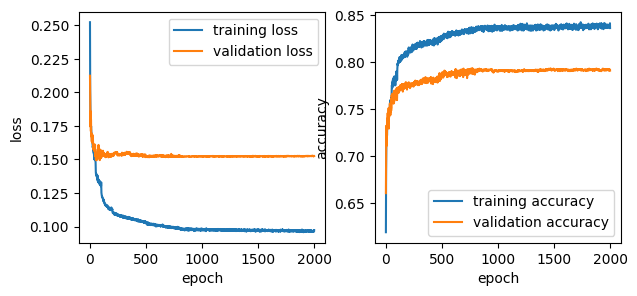

In [19]:
from matplotlib import pyplot as plt

fix, ax = plt.subplots(1, 2, figsize=(7,3))
ax[0].plot(history.history["loss"], label="training loss")
ax[0].plot(history.history["val_loss"], label="validation loss")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(history.history["accuracy"], label="training accuracy")
ax[1].plot(history.history["val_accuracy"], label="validation accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend()


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

predict = model.predict(iscx_feat_test)
predict = predict.argmax(axis=1)
predict = [labels[x] for x in predict]
y_hat = iscx_y_test.argmax(axis=1)
y_hat = [labels[x] for x in y_hat]

def evaluate_model(pred, y):    
    print(classification_report(y, pred))
    print(confusion_matrix(y, pred), "\n")
    
evaluate_model(predict, y_hat)

147/147 [==============================] - 0s 984us/step
              precision    recall  f1-score   support

    BROWSING       0.73      0.95      0.82      1238
        CHAT       0.71      0.43      0.54       531
          FT       0.88      0.59      0.71       740
        MAIL       0.85      0.83      0.84       197
         P2P       0.71      0.96      0.82       474
   STREAMING       0.88      0.62      0.73       252
        VOIP       1.00      0.99      0.99      1258

    accuracy                           0.82      4690
   macro avg       0.82      0.77      0.78      4690
weighted avg       0.83      0.82      0.81      4690

[[1173   33   16    1    3   12    0]
 [ 241  230   27   13   17    2    1]
 [ 123   28  436   14  130    6    3]
 [  15    6    8  164    4    0    0]
 [   9    3    3    0  455    2    2]
 [  44   21    4    0   26  157    0]
 [   2    1    2    0    6    0 1247]] 

